## Goal: Basic Vizualizations
- Note: will add more after have better idea of predictors. Right now I just want to tackle priors.
    - Then could go further in, look at conditions within a state

### Urban Rural Divide

In [ ]:
### It's not working because all in accident have at least one fatality. So stop tracking accidents


In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pd.set_option("display.max_rows", None, "display.max_columns", None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
#read in data
All2019 = pd.read_csv("General_Clean_2019")
Accident2019 = pd.read_csv("2019accident.csv")

In [3]:
#subset
Urban_Rural_1 = Accident2019[["ST_CASE","FATALS", "CITYNAME", "RUR_URBNAME", "COUNTYNAME"]]

#convert ST_Case into a accident counter (nvm this didn't work)
Urban_Rural_1.loc[:, "ST_CASE"] = Urban_Rural_1["ST_CASE"].apply(lambda x: x - 10000)

#final
Urban_Rural_1.head()

,ST_CASE,FATALS,CITYNAME,RUR_URBNAME,COUNTYNAME
0,1,1,OPELIKA,Urban,LEE (81)
1,2,1,GADSDEN,Urban,ETOWAH (55)
2,3,1,NOT APPLICABLE,Rural,CLEBURNE (29)
3,4,1,RAINBOW CITY,Rural,ETOWAH (55)
4,5,1,NOT APPLICABLE,Urban,BALDWIN (3)


In [4]:
#count missing values by column
count_nan = len(Urban_Rural_1) - Urban_Rural_1.count()
count_nan

#no missing values

ST_CASE        0
FATALS         0
CITYNAME       0
RUR_URBNAME    0
COUNTYNAME     0
dtype: int64

In [5]:
#Total Traffic Fatalities
Rural_Urban_Total_Fatalities = Urban_Rural_1.groupby("RUR_URBNAME").sum()
Rural_Urban_Total_Fatalities.drop("ST_CASE", axis=1, inplace=True)
Rural_Urban_Total_Fatalities.head()

# change index
Rural_Urban_Total_Fatalities = Rural_Urban_Total_Fatalities.reset_index()

Rural_Urban_Total_Fatalities

,RUR_URBNAME,FATALS
0,Not Reported,9
1,Rural,16340
2,Trafficway Not in State Inventory,90
3,Unknown,62
4,Urban,19595


<AxesSubplot:title={'center':'Traffic Fatalities By Environment'}, xlabel='Environment'>

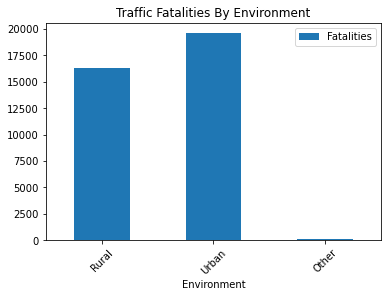

In [6]:
#Combine random stuff into other
int_ru = {"Environment": ["Rural", "Urban", 'Other'],
                   'Fatalities': ["16340", "19595", "161"],
                  }
int_rural_urban = pd.DataFrame(int_ru) 

#convert to numeric
int_rural_urban["Fatalities"] = int_rural_urban["Fatalities"].astype(int)

#graph
int_rural_urban.plot.bar(x="Environment", y="Fatalities", rot=45, title = "Traffic Fatalities By Environment")

In [7]:
#check that we have right number of fatalities
Total = Urban_Rural_1['FATALS'].sum()
print (Total)

# We're good for fatalities! This is exactly right

36096


In [9]:
#Fatalities by City (bar) --> nvm this isn't useful
City_Fatals = Urban_Rural_1.groupby("CITYNAME").sum()

#sort by ascending
City_Fatals['FATALS'] = City_Fatals["FATALS"].astype('int')
City_Fatals = City_Fatals.sort_values(by = "FATALS", ascending=False)

#print table
City_Fatals.head()


#not useful :/

,ST_CASE,FATALS
CITYNAME,,
NOT APPLICABLE,4511437408,18239
Not Reported,92432181,468
LOS ANGELES,13083301,267
HOUSTON,114652269,256
PHOENIX,5969847,205


In [48]:
#Fatalities by County (bar) --> nvm this isn't useful
County_Fatals = Urban_Rural_1.groupby("COUNTYNAME").sum()


#sort by ascending
County_Fatals['FATALS'] = County_Fatals["FATALS"].astype('int')
County_Fatals = County_Fatals.sort_values(by = "FATALS", ascending=False)

#table
County_Fatals.head()

#somewhat useful

,ST_CASE,FATALS
COUNTYNAME,,
LOS ANGELES (37),33532847,685
MARICOPA (13),12922030,442
HARRIS (201),188233982,421
SAN BERNARDINO (71),15225278,319
MIAMI-DADE (86),31463415,298


### By Time

###### Month

<AxesSubplot:title={'center':'Traffic Fatalities By Month'}, xlabel='MONTHNAME'>

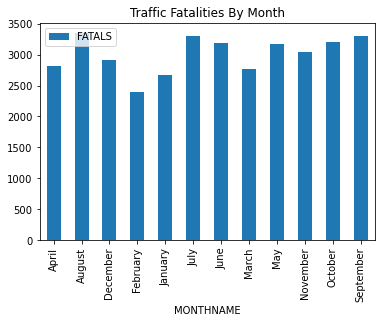

In [77]:
Acc_Month = Accident2019[["MONTHNAME", "FATALS"]]
month1 = Acc_Month.groupby('MONTHNAME')['FATALS'].sum()
month2 = pd.DataFrame(month1)
month2 = month2.reset_index()


#graph
month2.plot.bar(x="MONTHNAME", y="FATALS", rot=90, title = "Traffic Fatalities By Month")

###### Day in Month

<AxesSubplot:title={'center':'Traffic Fatalities By Days of the Month'}, xlabel='DAYNAME'>

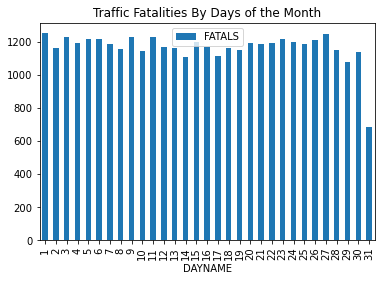

In [76]:
Acc_day = Accident2019[["DAYNAME", "FATALS"]]
day1 = Acc_day.groupby('DAYNAME')['FATALS'].sum()
day2 = pd.DataFrame(day1)
day2 = day2.reset_index()

day2.plot.bar(x="DAYNAME", y="FATALS", rot=90, title = "Traffic Fatalities By Days of the Month")

###### Day in Week

<AxesSubplot:title={'center':'Traffic Fatalities By Days of Week'}, xlabel='DAY_WEEK'>

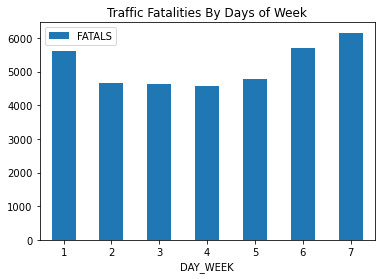

In [80]:
Acc_dayww = Accident2019[["DAY_WEEK", "FATALS"]]
dayww1 = Acc_dayww.groupby('DAY_WEEK')['FATALS'].sum()
dayww2 = pd.DataFrame(dayww1)
dayww2 = dayww2.reset_index()

dayww2.plot.bar(x="DAY_WEEK", y="FATALS", rot=0, title = "Traffic Fatalities By Days of Week")

###### Time/Hour of Day

<AxesSubplot:title={'center':'Traffic Fatalities By Time of Day'}, xlabel='HOURNAME'>

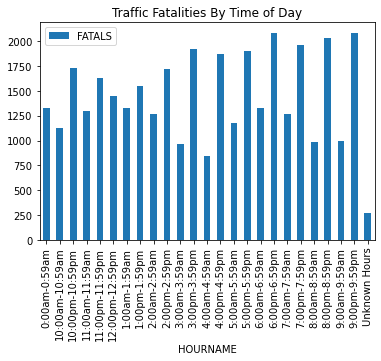

In [94]:
Acc_hr = Accident2019[["HOURNAME", "FATALS"]]
hr1 = Acc_hr.groupby('HOURNAME')['FATALS'].sum()
hr2 = pd.DataFrame(hr1)
hr2 = hr2.reset_index()

hr2.plot.bar(x="HOURNAME", y="FATALS", rot=90, title = "Traffic Fatalities By Time of Day")

### Weather

### Road Type

<AxesSubplot:title={'center':'Traffic Fatalities By Route'}, xlabel='ROUTENAME'>

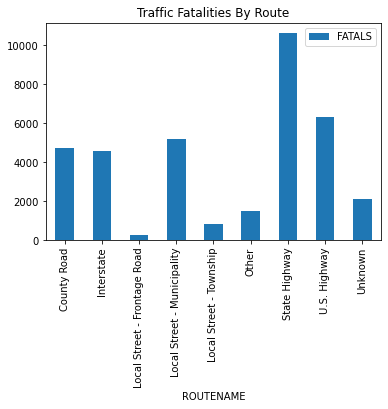

In [95]:
Acc_r = Accident2019[["ROUTENAME", "FATALS"]]
ro1 = Acc_r.groupby('ROUTENAME')['FATALS'].sum()
ro2 = pd.DataFrame(ro1)
ro2 = ro2.reset_index()

ro2.plot.bar(x="ROUTENAME", y="FATALS", rot=90, title = "Traffic Fatalities By Route")

<AxesSubplot:title={'center':'Traffic Fatalities By Road Type'}, xlabel='FUNC_SYSNAME'>

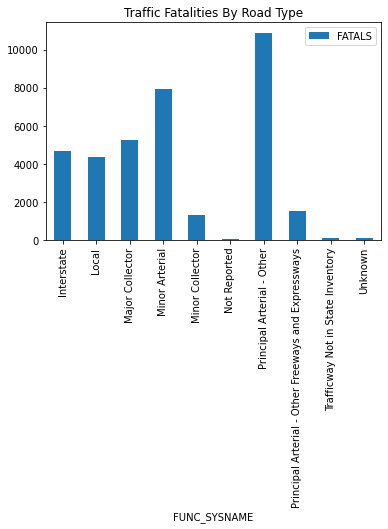

In [101]:
Acc_dr = Accident2019[["FUNC_SYSNAME", "FATALS"]]
dr1 = Acc_dr.groupby('FUNC_SYSNAME')['FATALS'].sum()
dr2 = pd.DataFrame(dr1)
dr2 = dr2.reset_index()

dr2.plot.bar(x="FUNC_SYSNAME", y="FATALS", rot=90, title = "Traffic Fatalities By Road Type")

#note: dot NY says that PA - Other is rural?


### Incorporate something about which person and type of injury, etc

In [10]:
Person = pd.read_csv("2019Person.csv")
Person_Type = Person[["INJ_SEVNAME", "PER_TYPNAME"]]
test = Person_Type.groupby("INJ_SEVNAME").size().reset_index(name='Total Number')
test.head()


##this is the paper

,INJ_SEVNAME,Total Number
0,Died Prior to Crash*,1
1,Fatal Injury (K),36096
2,"Injured, Severity Unknown",208
3,No Apparent Injury (O),21085
4,Possible Injury (C),6500


In [83]:
for col in Accident2019.columns:
    print(col)

STATE
STATENAME
ST_CASE
VE_TOTAL
VE_FORMS
PVH_INVL
PEDS
PERSONS
PERMVIT
PERNOTMVIT
COUNTY
COUNTYNAME
CITY
CITYNAME
DAY
DAYNAME
MONTH
MONTHNAME
YEAR
DAY_WEEK
DAY_WEEKNAME
HOUR
HOURNAME
MINUTE
MINUTENAME
NHS
NHSNAME
ROUTE
ROUTENAME
TWAY_ID
TWAY_ID2
RUR_URB
RUR_URBNAME
FUNC_SYS
FUNC_SYSNAME
RD_OWNER
RD_OWNERNAME
MILEPT
MILEPTNAME
LATITUDE
LATITUDENAME
LONGITUD
LONGITUDNAME
SP_JUR
SP_JURNAME
HARM_EV
HARM_EVNAME
MAN_COLL
MAN_COLLNAME
RELJCT1
RELJCT1NAME
RELJCT2
RELJCT2NAME
TYP_INT
TYP_INTNAME
WRK_ZONE
WRK_ZONENAME
REL_ROAD
REL_ROADNAME
LGT_COND
LGT_CONDNAME
WEATHER1
WEATHER1NAME
WEATHER2
WEATHER2NAME
WEATHER
WEATHERNAME
SCH_BUS
SCH_BUSNAME
RAIL
RAILNAME
NOT_HOUR
NOT_HOURNAME
NOT_MIN
NOT_MINNAME
ARR_HOUR
ARR_HOURNAME
ARR_MIN
ARR_MINNAME
HOSP_HR
HOSP_HRNAME
HOSP_MN
HOSP_MNNAME
CF1
CF1NAME
CF2
CF2NAME
CF3
CF3NAME
FATALS
DRUNK_DR
